<a href="https://colab.research.google.com/github/lpoggetto/aulas_machine_learning_FIAP/blob/main/aula220240919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
treino = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/notas%20-%20ok.csv')
treino.head()

,AP1,AP2,AP3,Final
0,10.0,10.0,9.0,9.8
1,9.0,10.0,9.0,9.4
2,9.5,10.0,10.0,9.8
3,9.4,9.9,9.9,9.7
4,9.3,9.8,9.8,9.6


In [6]:
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(treino[['AP1','AP2']],treino['AP3'])
print(reglin.coef_)
print(reglin.intercept_)

[-0.36608176  1.38338992]
-0.8257714929014783


In [11]:
def prever_ap3(ap1,ap2):
  return reglin.coef_[0]*ap1+reglin.coef_[1]*ap2+reglin.intercept_

prever_ap3(8,9)

7.312693817322946

In [12]:
teste = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/notas-rl%20-%20test.csv')

,AP1,AP2,AP3
0,8.0,8,7
1,2.0,4,4
2,3.5,8,9


In [14]:
prev_teste = reglin.predict(teste[['AP1','AP2']])
prev_teste

array([7.31269382, 3.97562468, 8.96006172])

In [15]:
from sklearn.metrics import r2_score
r2_score(teste['AP3'], prev_teste)

0.9921078963709334

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(teste['AP3'], prev_teste)
print('MSE Teste', mse)
print('RMSE Teste', np.sqrt(mse))

MSE Teste 0.0333222153227253
RMSE Teste 0.18254373536970614


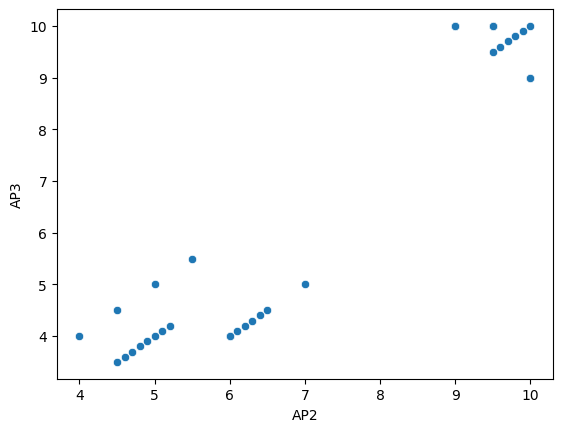

In [24]:
sns.scatterplot(treino, x = 'AP2', y = 'AP3');

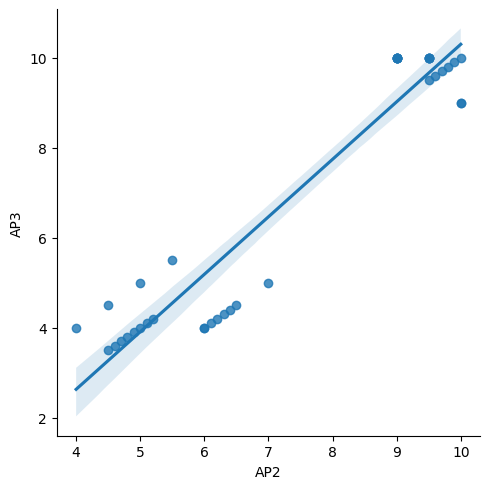

In [25]:
sns.lmplot(treino, x = 'AP2', y = 'AP3');
#

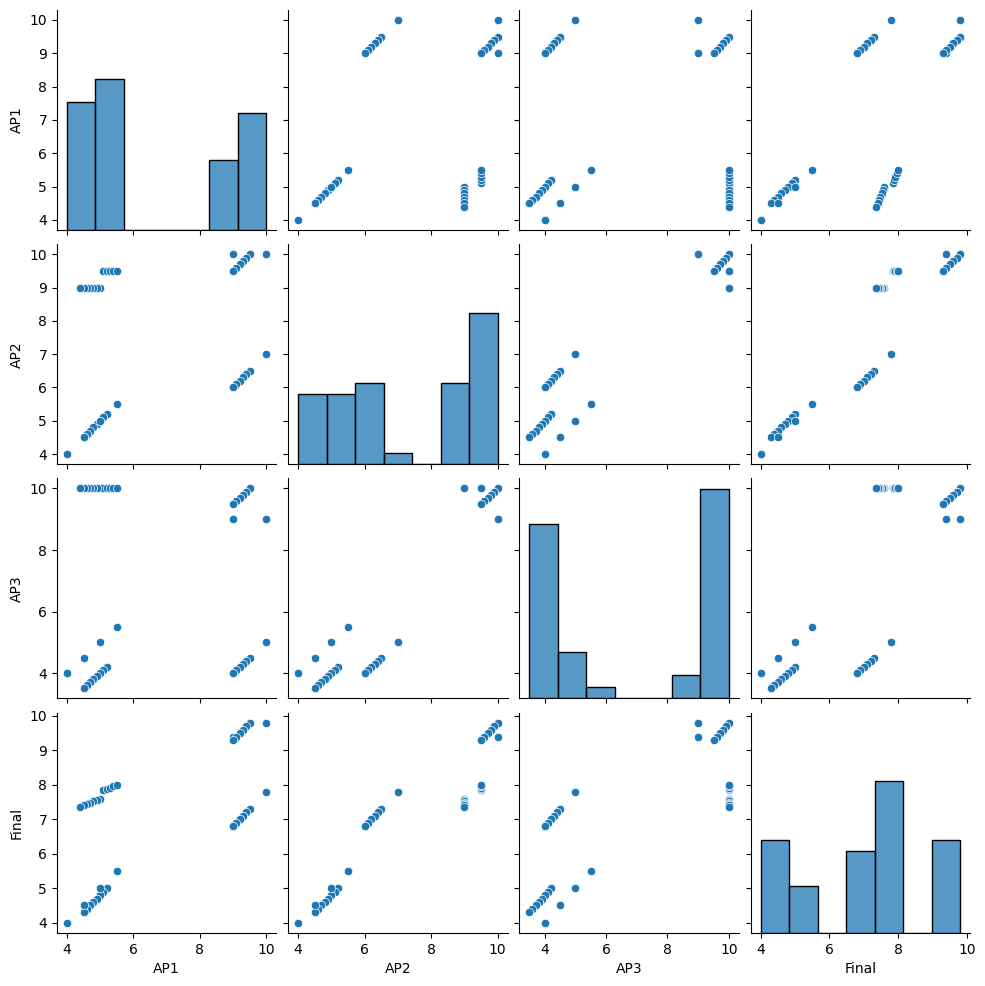

In [26]:
sns.pairplot(treino)

In [27]:
treino.corr()

,AP1,AP2,AP3,Final
AP1,1.000000,0.278632,0.003717,0.630113
AP2,0.278632,1.000000,0.952691,0.920175
AP3,0.003717,0.952691,1.000000,0.776387
Final,0.630113,0.920175,0.776387,1.000000


<Axes: >

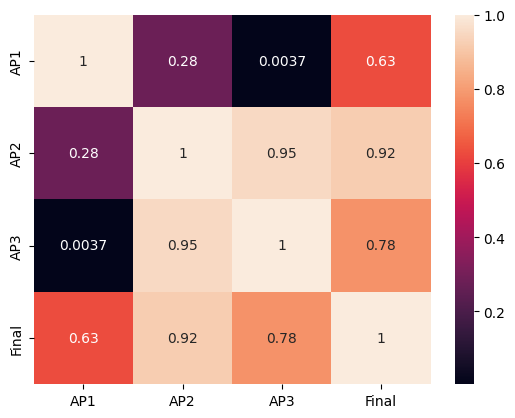

In [28]:
sns.heatmap(treino.corr(), annot=True)
#